### TP4

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import os

## Funciones para las regresiones Lineales

In [61]:
# Definimos la función lineal que utilizaremos para el ajuste
def lineal(x, a, b):
    return a * x + b

# Función para ajustar la curva con incertidumbres
def fit_with_curve(funcion, x, y, y_err):
    popt, pconv = curve_fit(funcion, x, y, sigma=y_err, absolute_sigma=True)
    return popt[0], popt[1], np.sqrt(pconv.diagonal())[0], np.sqrt(pconv.diagonal())[1]

In [62]:
1/60

0.016666666666666666

### Calibración

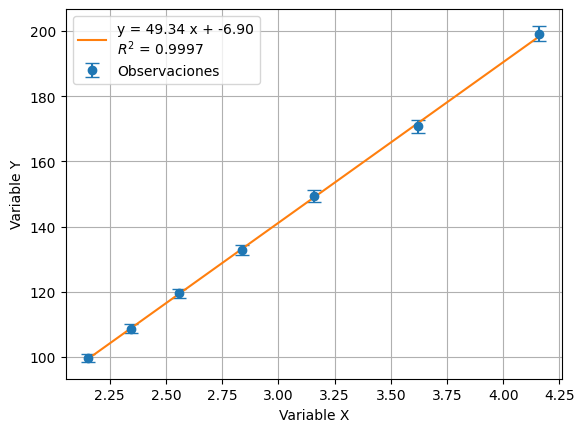

Pendiente = 49.338 ± 1.013
Intersección = -6.897 ± 2.801


In [63]:
df = pd.read_csv('mediciones/Calib.csv')

# Datos de entrada

df['Presion'] = 99.61 * 60 / df['Volumen']
df['ErrorP'] = df['Presion'] * np.sqrt(2) * (1/60 * 1/2)

variableX = df['Voltaje'] #NombreVariableX
variableY = df['Presion'] #NombreVariableY
incertidumbre_variableY = df['ErrorP'] #NombreVariableErrorY'

# Ajuste de la curva utilizando la función de ajuste personalizada
pendiente, interseccion, error_pendiente, error_interseccion = fit_with_curve(lineal, variableX, variableY, incertidumbre_variableY)

# Cálculo del coeficiente de determinación R^2
R2 = 1 - np.sum((lineal(variableX, pendiente, interseccion) - variableY)**2) / np.sum((variableY - np.mean(variableY))**2)


# Visualización de los datos observados y el ajuste lineal
plt.errorbar(variableX, variableY, yerr=incertidumbre_variableY, fmt='o', label='Observaciones', capsize=5)
#plt.plot(variableX, variableY, 'o', label='Observaciones')
plt.plot(variableX, lineal(variableX, pendiente, interseccion), label=f"y = {pendiente:.2f} x + {interseccion:.2f}\n"+r"$R^2$"+f" = {R2:.4f}")

# Etiquetas de los ejes
plt.xlabel("Variable X")
plt.ylabel("Variable Y")
plt.legend()
plt.grid()
plt.show()

# Impresión de los parámetros ajustados y sus incertidumbres
print(f"Pendiente = {round(pendiente, 3)} ± {round(error_pendiente, 3)}")
print(f"Intersección = {round(interseccion, 3)} ± {round(error_interseccion, 3)}")



In [64]:
df

,Voltaje,Volumen,Error,Presion,ErrorP
0,2.155,60,1,99.610000,1.173915
1,2.345,55,1,108.665455,1.280635
2,2.560,50,1,119.532000,1.408698
3,2.840,45,1,132.813333,1.565220
4,3.160,40,1,149.415000,1.760873
5,3.620,35,1,170.760000,2.012426
6,4.160,30,1,199.220000,2.347830


In [65]:
# Pendiente = 49.338 ± 2.432
# Intersección = -6.897 ± 6.722

In [66]:
# Compresiones:
c1 = pd.read_csv('mediciones/comp-1-60-22_5.5',header=2, sep = "\t",decimal=",")
c2 = pd.read_csv('mediciones/comp-2-56',header=2, sep = "\t",decimal=",")
c3 = pd.read_csv('mediciones/comp-3-52',header=2, sep = "\t",decimal=",")
c4 = pd.read_csv('mediciones/comp-4-49',header=2, sep = "\t",decimal=",")
c5 = pd.read_csv('mediciones/comp-5-46',header=2, sep = "\t",decimal=",")
c6 = pd.read_csv('mediciones/comp-6-42',header=2, sep = "\t",decimal=",")
c7 = pd.read_csv('mediciones/comp-7-38',header=2, sep = "\t",decimal=",")
c8 = pd.read_csv('mediciones/comp-8-35',header=2, sep = "\t",decimal=",")
c9 = pd.read_csv('mediciones/comp-9-32',header=2, sep = "\t",decimal=",")
c10 = pd.read_csv('mediciones/comp-10-29',header=2, sep = "\t",decimal=",")

compresiones = [c1,c2,c3,c4,c5,c6,c7,c8,c9,c10]
compresiones_desde = [60,56,52,49,46,42,38,35,32,29]

In [67]:
# Expansiones:
e1 = pd.read_csv('mediciones/expa-1-23-60',header=2, sep = "\t",decimal=",")
e2 = pd.read_csv('mediciones/expa-1_5-26',header=2, sep = "\t",decimal=",")
e3 = pd.read_csv('mediciones/expa-2-30',header=2, sep = "\t",decimal=",")
e4 = pd.read_csv('mediciones/expa-3-33',header=2, sep = "\t",decimal=",")
e5 = pd.read_csv('mediciones/expa-4-35',header=2, sep = "\t",decimal=",")
e6 = pd.read_csv('mediciones/expa-5-40',header=2, sep = "\t",decimal=",")
e7 = pd.read_csv('mediciones/expa-6-42',header=2, sep = "\t",decimal=",")
e8 = pd.read_csv('mediciones/expa-7-45',header=2, sep = "\t",decimal=",")
e9 = pd.read_csv('mediciones/expa-8-48',header=2, sep = "\t",decimal=",")
e10 = pd.read_csv('mediciones/expa-9-55',header=2, sep = "\t",decimal=",")

expansiones = [e1,e2,e3,e4,e5,e6,e7,e8,e9,e10]
expansiones_desde = [23,26,30,33,35,40,42,45,48,55]

In [68]:
def graficar_dataframes(dfs, labels, titulo_labels):
    plt.figure(figsize=(10, 6))
    for df, l in zip(dfs, labels):
        plt.plot(df['time'], df['(KPA)'], linestyle='-', label=str(l))#, marker='.')
    plt.xlabel('Tiempo')
    plt.ylabel('KPA')
    plt.title('')
    plt.grid(True)
    plt.legend(title=titulo_labels)
    plt.show()

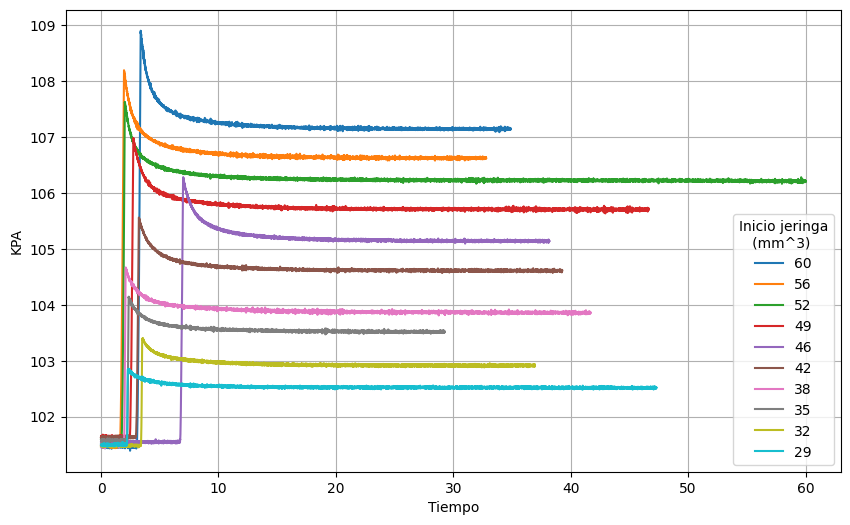

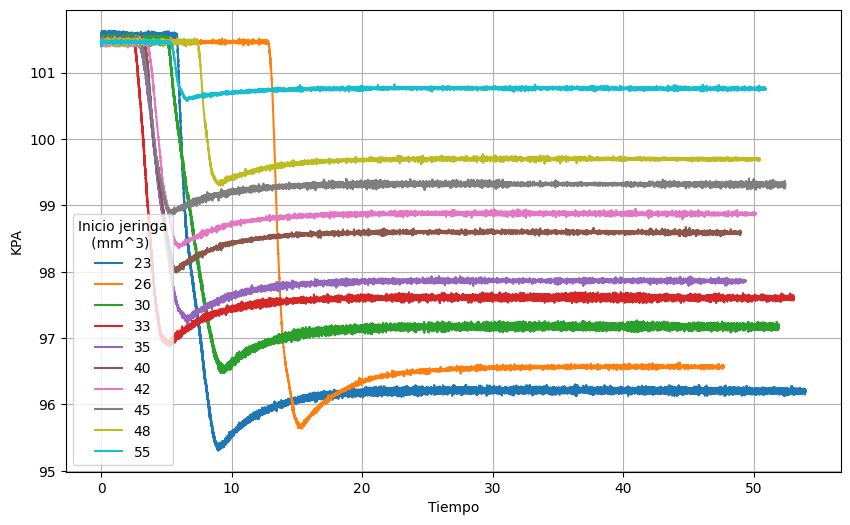

In [69]:
# Supongamos que df es tu DataFrame
graficar_dataframes(compresiones, compresiones_desde, "Inicio jeringa\n   (mm^3)")
graficar_dataframes(expansiones, expansiones_desde, "Inicio jeringa\n   (mm^3)")

In [70]:
## Pasa los datos del df a float32 y les agrega el error correspondiente por la calibración
def arreglar(dataFrames, interseccion, pendiente, error_pendiente, error_interseccion):
    for i in range(len(dataFrames)):
        df = dataFrames[i].copy()  # Crear una copia explícita
        df = df.astype(np.float32)  # Transformo a floats
        df["Error"] = np.sqrt((((df["(KPA)"] - interseccion) / pendiente) * error_pendiente)**2 + error_interseccion**2)
        dataFrames[i] = df  # Reemplazar el DataFrame original con el modificado
    return dataFrames  # Devolver la lista de DataFrames modificados

In [71]:
df

,Voltaje,Volumen,Error,Presion,ErrorP
0,2.155,60,1,99.610000,1.173915
1,2.345,55,1,108.665455,1.280635
2,2.560,50,1,119.532000,1.408698
3,2.840,45,1,132.813333,1.565220
4,3.160,40,1,149.415000,1.760873
5,3.620,35,1,170.760000,2.012426
6,4.160,30,1,199.220000,2.347830


In [72]:
compresiones = arreglar(compresiones, interseccion, pendiente, error_pendiente, error_interseccion)
expansiones = arreglar(expansiones, interseccion, pendiente, error_pendiente, error_interseccion)

In [73]:
datos = []
num_inicio = 300
num_fin = 1600
for df in compresiones:
    b = []
    b.append(df["(KPA)"].head(num_inicio).mean()) ## tomo el primer segundo y medio
    b.append(df["(KPA)"].max())
    b.append(df["(KPA)"].iloc[-num_fin:].mean()) ## tomo los últimos 8 segundos.

    error_estadistico = df["(KPA)"].head(num_inicio).std() / np.sqrt(num_inicio)  # error estadístico

    # Pregunta: En el error instrumental no deberíamos hacer la diferencia entre valores consecutivos
    #           y ahi quedarnos con la mínima diferencia distinta de cero?
    error_instrumental = df["Error"].head(num_inicio).max() # tomo el más grande como el instrumental
    
    error = np.sqrt(error_estadistico**2 + error_instrumental**2)

    b.append(error) ##Agrego Error KPA
    b.append(df["Error"].max()) ##(tiene que coincidir con el maximo si o si con el error Max)

    error_estadistico = df["(KPA)"].iloc[-num_fin:].std() / np.sqrt(num_fin)  ## error estadístico
    # Pregunta: acá lo mismo que arriba
    error_instrumental = df["Error"].iloc[-num_fin:].max()
    error = np.sqrt(error_estadistico**2 + error_instrumental**2)  ##tomo el más grande como el instrumental agarro el máximo instrumental y lo sobreestimo

    b.append(error) ##Agrego Error KPA
    datos.append(b)


In [74]:
error_estadistico

0.0002654454903677106

In [75]:
error_instrumental

3.5912595

In [76]:
df_dummy = (df["(KPA)"] - df["(KPA)"].shift(1)).abs()
min_error = df_dummy[~(df_dummy == 0)].min()
min_error

0.0011978149

In [77]:
np.sqrt((((min_error - interseccion) / pendiente) * error_pendiente)**2 + error_interseccion**2)

2.8044831995219686

In [78]:
estad = df["(KPA)"].iloc[-1600:].std()
print(estad)

0.01061782


In [79]:
pa = datos[5][0]
pb = datos[5][1]
pc = datos[5][2]
epa = datos[5][3]
epb = datos[5][4]
epc = datos[5][5] ##sqrt(f_pb *epb + f_pa *epa) / valor        Se divide por valor para que sea el valor relativo
print(np.sqrt((1/pb * epb)**2)+(1/pa*epa)**2/np.log(pb/pa))
print(np.sqrt((1/pc * epc)**2)+(1/pa*epa)**2/np.log(pc/pa)) ## es más grande el error relativo este

0.0670745190176632
0.07747888727649721


In [80]:

x=[]
y=[]
error = []
for pa, pb, pc, epa, epb, epc in datos:
    x.append(np.log(pb/pa))
    y.append(np.log(pc/pa))
    error.append(np.sqrt((1/pb * epb)**2)+(1/pa*epa)**2)   ##propagación de error

## F = ln(pb/ba)
### => F_pb = 1/pb
### => F_pa = -1/pa

x = np.array(x)
y = np.array(y)

error = np.array(error)

variableX = x #NombreVariableX
variableY = y #NombreVariableY
incertidumbre_variableY = error #NombreVariableErrorY'

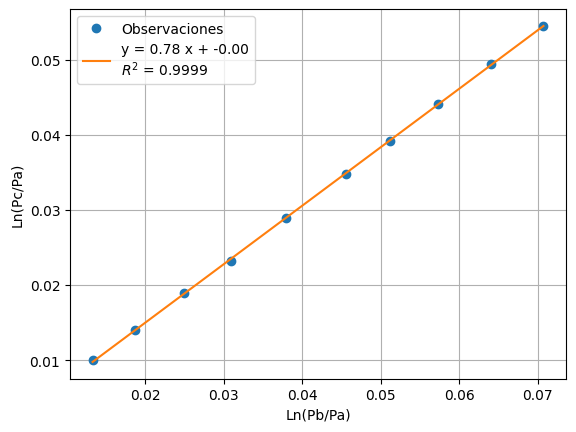

Pendiente = 0.778 ± 0.607
Intersección = -0.001 ± 0.028
Gamma = 1/pendiente = 1.285 ± 1.002 << Revisar error!
0.607
Suma de errores mínimos cuadrados: 2.0841223e-07
Suma de errores cuadráticos mínimos ponderados: 0.0001631949015056649
ChiCuadradoReducido es:
2.0399362688208113e-05
R2 es
0.9998998516311985


In [81]:
# Ajuste de la curva utilizando la función de ajuste personalizada
pendiente, interseccion, error_pendiente, error_interseccion = fit_with_curve(lineal, variableX, variableY, incertidumbre_variableY)

# Cálculo del coeficiente de determinación R^2
R2 = 1 - np.sum((lineal(variableX, pendiente, interseccion) - variableY)**2) / np.sum((variableY - np.mean(variableY))**2)

# Visualización de los datos observados y el ajuste lineal
plt.plot(variableX, variableY, 'o', label='Observaciones')
plt.plot(variableX, lineal(variableX, pendiente, interseccion), label=f"y = {pendiente:.2f} x + {interseccion:.2f}\n"+r"$R^2$"+f" = {R2:.4f}")

# Etiquetas de los ejes
plt.xlabel("Ln(Pb/Pa)")
plt.ylabel("Ln(Pc/Pa)")
plt.legend()
plt.grid()
plt.show()

# Impresión de los parámetros ajustados y sus incertidumbres
print(f"Pendiente = {round(pendiente, 3)} ± {round(error_pendiente, 3)}")
print(f"Intersección = {round(interseccion, 3)} ± {round(error_interseccion, 3)}")

print(f"Gamma = 1/pendiente = {round(1/pendiente, 3)} ± {round(error_pendiente / pendiente**2, 3)} << Revisar error!")
print(round(error_pendiente, 3))


# Calcular los valores ajustados
valores_ajustados = lineal(variableX, pendiente, interseccion)

# Calcular la suma de errores mínimos cuadrados
suma_errores_cuadrados = np.sum((valores_ajustados - variableY)**2)

print("Suma de errores mínimos cuadrados:", suma_errores_cuadrados)



# Calcular los residuos ponderados
residuos_ponderados = (variableY - valores_ajustados) / incertidumbre_variableY

# Calcular la suma de errores cuadráticos mínimos ponderados
suma_errores_ponderados_cuadrados = np.sum(residuos_ponderados**2)

print("Suma de errores cuadráticos mínimos ponderados:", suma_errores_ponderados_cuadrados)



#Ahora tengo que calcular el chi cuadrado reducido que sería exactamente lo mismo pero divido 8
# Ya que tengo 10 grados de libertad y 2 números de parámetros

chiCuadradoReducido = suma_errores_ponderados_cuadrados/8

print("ChiCuadradoReducido es:")
print(chiCuadradoReducido)

print("R2 es")
print(R2)

## Distintas Velocidades de Compresiones


In [82]:
c1v = pd.read_csv('mediciones/comp-vel-29-0.2', header=2, sep="\t", decimal=",")
c2v = pd.read_csv('mediciones/comp-vel-29-1', header=2, sep="\t", decimal=",")
c3v = pd.read_csv('mediciones/comp-vel-29-2', header=2, sep="\t", decimal=",")
c4v = pd.read_csv('mediciones/comp-29-vel-3', header=2, sep="\t", decimal=",")

c5v = pd.read_csv('mediciones/comp-vel-60-0.2', header=2, sep="\t", decimal=",")
c6v = pd.read_csv('mediciones/com-vel-60-0.5', header=2, sep="\t", decimal=",")
c7v = pd.read_csv('mediciones/comp-vel-60-1', header=2, sep="\t", decimal=",")
c8v = pd.read_csv('mediciones/comp-vel-60-2', header=2, sep="\t", decimal=",")
c9v = pd.read_csv('mediciones/comp-vel-60-3', header=2, sep="\t", decimal=",")

compresiones_vel_29 = [c1v,c2v,c3v,c4v]
compresiones_vel_29_labels = [1,2,3,4]
compresiones_vel_60 = [c5v,c6v,c7v,c8v,c9v]
compresiones_vel_60_labels = [1,2,3,4,5]

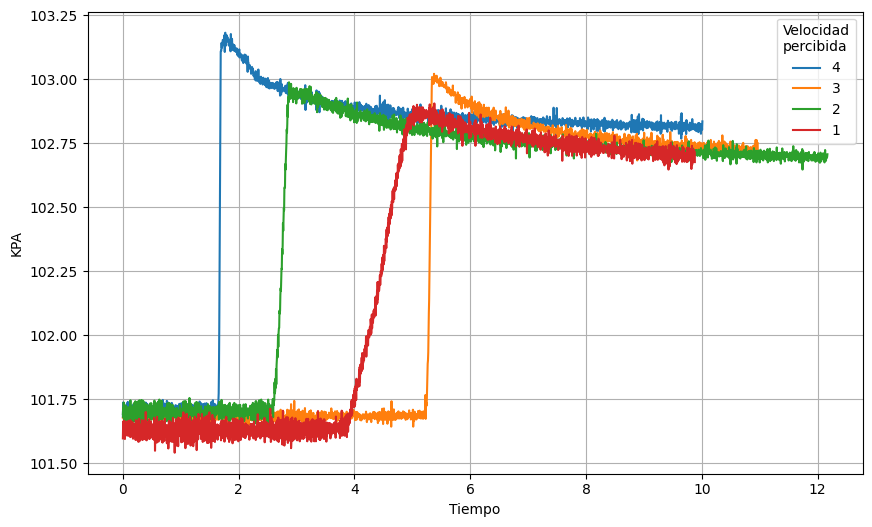

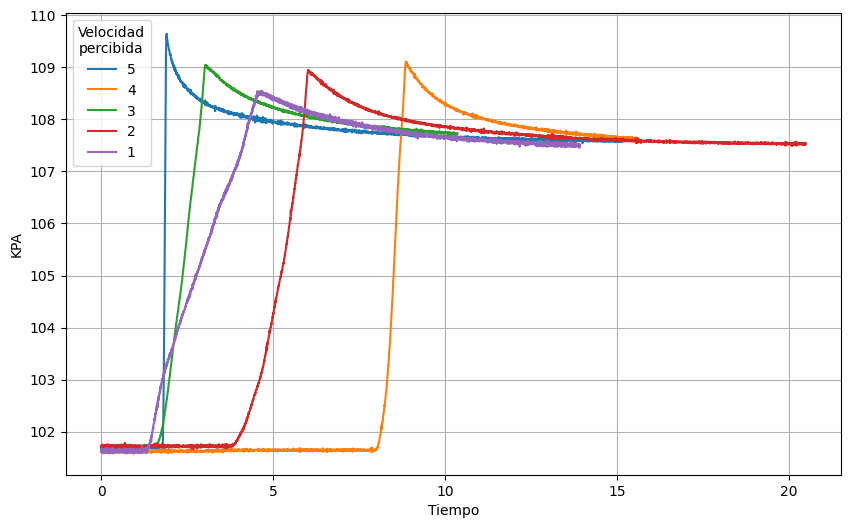

In [83]:
graficar_dataframes(compresiones_vel_29[::-1], compresiones_vel_29_labels[::-1], "Velocidad\npercibida")
graficar_dataframes(compresiones_vel_60[::-1], compresiones_vel_60_labels[::-1], "Velocidad\npercibida")

## Análisis de las expansiones

In [84]:

datos2 = []
for df in expansiones:
    c = []
    c.append(df["(KPA)"].head(300).mean()) ## tomo el primer segundo y medio
    c.append(df["(KPA)"].min())
    c.append(df["(KPA)"].iloc[-1600:].mean()) ##tomo los últimos 8 segundos.
    estad = df["(KPA)"].head(300).std()/ np.sqrt(300)  ## error estadístico
    error = np.sqrt(estad**2 + df["Error"].head(300).max()**2) ##tomo el más grande como el instrumental
    c.append(error) ##Agrego Error KPA
    c.append(df["Error"].min())
    estad = df["(KPA)"].iloc[-1600:].std()/ np.sqrt(1600)  ## error estadístico
    error = np.sqrt(estad**2 + df["Error"].iloc[-1600:].max()**2)  ##tomo el más grande como el instrumental
    c.append(error) ##Agrego Error KPA
    datos2.append(c)




In [85]:
pa = datos2[5][0]
pb = datos2[5][1]
pc = datos2[5][2]
epa = datos2[5][3]
epb = datos2[5][4]
epc = datos2[5][5]
print(np.sqrt((1/pb * epb)**2)+(1/pa*epa)**2/np.log(pb/pa)*(-1)) ## es más grande el error relativo este
print(np.sqrt((1/pc * epc)**2)+(1/pa*epa)**2/np.log(pc/pa)*(-1)) ## es más grande el error relativo este

0.07144150611809125
0.07872169328491296


In [86]:
x2=[]
y2=[]
error2 = []
for pa,pb,pc,epa,epb,epc in datos2:
    x2.append(np.log(pc/pa))
    y2.append( np.log(pb/pa))
    error2.append(np.sqrt((1/pb * epb)**2)+(1/pa*epa)**2) ##prop de error

## F = ln(pb/ba)
### => F_pb = 1/pb
### => F_pa = -1/pa


x2 = np.array(x2)

y2 = np.array(y2)

error2 = np.array(error2)


In [87]:
variableX = x2 #NombreVariableX
variableY = y2 #NombreVariableY
incertidumbre_variableY = error2 #NombreVariableErrorY'




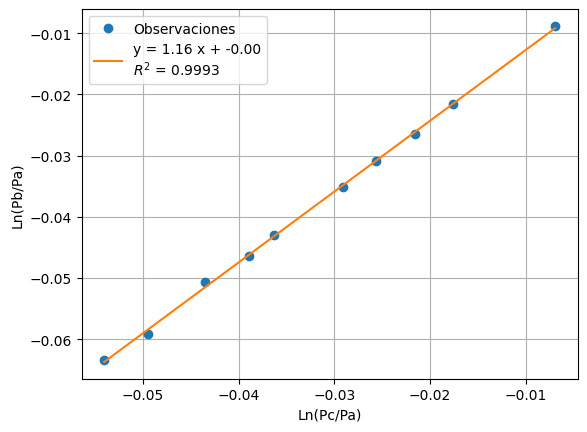

Pendiente = 1.159 ± 0.839
Intersección = -0.001 ± 0.029
0.839
Suma de errores mínimos cuadrados: 1.7870939e-06
Suma de errores cuadráticos mínimos ponderados: 0.001265387841995885
ChiCuadradoReducido es:
4.363406351709949e-05
R2 es
0.9993280422640964


In [88]:

# Ajuste de la curva utilizando la función de ajuste personalizada
pendiente, interseccion, error_pendiente, error_interseccion = fit_with_curve(lineal, variableX, variableY, incertidumbre_variableY)

# Cálculo del coeficiente de determinación R^2
R2 = 1 - np.sum((lineal(variableX, pendiente, interseccion) - variableY)**2) / np.sum((variableY - np.mean(variableY))**2)


# Visualización de los datos observados y el ajuste lineal
plt.plot(variableX, variableY, 'o', label='Observaciones')
plt.plot(variableX, lineal(variableX, pendiente, interseccion), label=f"y = {pendiente:.2f} x + {interseccion:.2f}\n"+r"$R^2$"+f" = {R2:.4f}")

# Etiquetas de los ejes
plt.xlabel("Ln(Pc/Pa)")
plt.ylabel("Ln(Pb/Pa)")
plt.legend()
plt.grid()
plt.show()

# Impresión de los parámetros ajustados y sus incertidumbres
print(f"Pendiente = {round(pendiente, 3)} ± {round(error_pendiente, 3)}")
print(f"Intersección = {round(interseccion, 3)} ± {round(error_interseccion, 3)}")

print(round(error_pendiente, 3))


# Calcular los valores ajustados
valores_ajustados = lineal(variableX, pendiente, interseccion)

# Calcular la suma de errores mínimos cuadrados
suma_errores_cuadrados = np.sum((valores_ajustados - variableY)**2)

print("Suma de errores mínimos cuadrados:", suma_errores_cuadrados)



# Calcular los residuos ponderados
residuos_ponderados = (variableY - valores_ajustados) / incertidumbre_variableY

# Calcular la suma de errores cuadráticos mínimos ponderados
suma_errores_ponderados_cuadrados = np.sum(residuos_ponderados**2)

print("Suma de errores cuadráticos mínimos ponderados:", suma_errores_ponderados_cuadrados)



#Ahora tengo que calcular el chi cuadrado reducido que sería exactamente lo mismo pero divido 29
# Ya que tengo 31 grados de libertad y 2 números de parámetros

chiCuadradoReducido = suma_errores_ponderados_cuadrados/29

print("ChiCuadradoReducido es:")
print(chiCuadradoReducido)




print("R2 es")
print(R2)




